In [14]:
import pandas as pd
import numpy as np
import json
import gzip
import os
import os.path
from os import listdir
import multiprocessing
from tqdm import tqdm
import mmap
from multiprocessing import Pool
import seaborn as sns

In [15]:
small_test = pd.read_csv('../../../src/data/schemafiltereddata/TrainTestTables/Small/STest_Files.csv')
small_test

,Unnamed: 0,filename,Class,num_rows,num_columns,num_columns_selected,num_NAs,percentage_col_NA,percentage_table_NA,sum_NA_sel_col,...,Restaurant_openinghoursspecification,Restaurant_pricerange,Restaurant_servescuisine,Restaurant_telephone,TVEpisode_episodenumber,TVEpisode_name,TVEpisode_partofseries,Small,Medium,Large
0,106,Book_calamo.com_September2020.json.gz,Book,15746.0,10.0,7.0,6174,0.193891,0.056014,43218.0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
1,201,Book_follasnovas.com_September2020.json.gz,Book,1167.0,7.0,5.0,181,0.152528,0.031020,905.0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
2,472,Book_norfolk-tree-surgeon.co.uk_September2020....,Book,235.0,11.0,9.0,0,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
3,510,Book_pirtukakurdi.com_September2020.json.gz,Book,993.0,8.0,5.0,218,0.188318,0.043907,1090.0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
4,572,Book_slkbali-lollypop.com_September2020.json.gz,Book,52.0,13.0,9.0,7,0.057692,0.014957,63.0,...,0,0,0,0,0,0,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,53789,Restaurant_laterrassedujardin.com_September202...,Restaurant,22.0,13.0,9.0,11,0.363636,0.055556,99.0,...,1,1,1,1,0,0,0,1.0,0.0,0.0
390,53835,Restaurant_nashvilledelivers.com_September2020...,Restaurant,94.0,9.0,6.0,2,0.021277,0.003546,12.0,...,0,1,1,1,0,0,0,0.0,1.0,0.0
391,53935,Restaurant_tahoesbest.com_September2020.json.gz,Restaurant,32.0,10.0,7.0,5,0.093750,0.022321,35.0,...,0,1,1,1,0,0,0,1.0,0.0,0.0
392,54035,TVEpisode_erosnow.com_September2020.json.gz,TVEpisode,21.0,10.0,2.0,0,0.000000,0.000000,0.0,...,0,0,0,0,0,1,1,1.0,0.0,0.0


In [16]:
anzahl = small_test.value_counts('Class')
anzahl

Class
Product           169
MusicRecording     46
Event              39
CreativeWork       35
Recipe             31
Person             28
LocalBusiness      21
Hotel               7
Place               6
Book                5
Restaurant          3
MusicAlbum          2
TVEpisode           2
dtype: int64

In [17]:
medium_test = pd.read_csv('../../../src/data/schemafiltereddata/TrainTestTables/Medium/MTest_Files.csv')
medium_test

,Unnamed: 0,filename,Class,num_rows,num_columns,num_columns_selected,num_NAs,percentage_col_NA,percentage_table_NA,sum_NA_sel_col,...,Restaurant_openinghoursspecification,Restaurant_pricerange,Restaurant_servescuisine,Restaurant_telephone,TVEpisode_episodenumber,TVEpisode_name,TVEpisode_partofseries,Small,Medium,Large
0,38,Book_atlaskitap.com_September2020.json.gz,Book,2015.0,8.0,5.0,1,0.000496,0.000099,5.0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
1,41,Book_auth-e83.co.uk_September2020.json.gz,Book,947.0,12.0,9.0,0,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
2,61,Book_berghahnbooks.com_September2020.json.gz,Book,697.0,12.0,9.0,6,0.002869,0.000956,54.0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
3,79,Book_boldtypebooks.com_September2020.json.gz,Book,105.0,12.0,7.0,7,0.057143,0.009524,49.0,...,0,0,0,0,0,0,0,0.0,1.0,0.0
4,106,Book_calamo.com_September2020.json.gz,Book,15746.0,10.0,7.0,6174,0.193891,0.056014,43218.0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1954,54036,TVEpisode_ezfilm.net_September2020.json.gz,TVEpisode,101.0,5.0,2.0,0,0.000000,0.000000,0.0,...,0,0,0,0,1,1,0,0.0,1.0,0.0
1955,54055,TVEpisode_grnrngr.com_September2020.json.gz,TVEpisode,910.0,7.0,3.0,0,0.000000,0.000000,0.0,...,0,0,0,0,1,1,1,0.0,0.0,1.0
1956,54118,TVEpisode_semhade.com_September2020.json.gz,TVEpisode,89.0,5.0,2.0,0,0.000000,0.000000,0.0,...,0,0,0,0,1,1,0,0.0,1.0,0.0
1957,54123,TVEpisode_sinefy.net_September2020.json.gz,TVEpisode,71.0,5.0,2.0,13,0.183099,0.091549,26.0,...,0,0,0,0,1,1,0,0.0,1.0,0.0


In [18]:
anzahl1 = medium_test.value_counts('Class')
anzahl1

Class
Product           848
MusicRecording    221
Event             200
CreativeWork      177
Recipe            156
Person            144
LocalBusiness      94
Place              33
Hotel              32
Book               23
Restaurant         16
MusicAlbum          8
TVEpisode           7
dtype: int64

In [19]:
large_test = pd.read_csv('../../../src/data/schemafiltereddata/TrainTestTables/Large/Test_Files.csv')
large_test

,Unnamed: 0,filename,Class,num_rows,num_columns,num_columns_selected,num_NAs,percentage_col_NA,percentage_table_NA,sum_NA_sel_col,...,Restaurant_openinghoursspecification,Restaurant_pricerange,Restaurant_servescuisine,Restaurant_telephone,TVEpisode_episodenumber,TVEpisode_name,TVEpisode_partofseries,Small,Medium,Large
0,1,Book_19shuwu.com_September2020.json.gz,Book,250.0,8.0,5.0,0,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
1,7,Book_4thestate.co.uk_September2020.json.gz,Book,1336.0,10.0,6.0,523,0.391467,0.065245,3138.0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
2,9,Book_80mundos.com_September2020.json.gz,Book,2748.0,10.0,7.0,696,0.129185,0.036182,4872.0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
3,21,Book_alexanderstreet.com_September2020.json.gz,Book,197.0,11.0,5.0,146,0.446701,0.148223,730.0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
4,28,Book_apress.com_September2020.json.gz,Book,399.0,8.0,5.0,124,0.308271,0.062155,620.0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9750,54165,TVEpisode_univision.com_September2020.json.gz,TVEpisode,3150.0,5.0,2.0,0,0.000000,0.000000,0.0,...,0,0,0,0,1,1,0,0.0,0.0,1.0
9751,54174,TVEpisode_votenova.org_September2020.json.gz,TVEpisode,55.0,9.0,2.0,0,0.000000,0.000000,0.0,...,0,0,0,0,0,1,1,0.0,1.0,0.0
9752,54176,TVEpisode_watermarkthefilm.com_September2020.j...,TVEpisode,40.0,9.0,2.0,0,0.000000,0.000000,0.0,...,0,0,0,0,0,1,1,1.0,0.0,0.0
9753,54182,TVEpisode_ww2d.org_September2020.json.gz,TVEpisode,54.0,8.0,2.0,0,0.000000,0.000000,0.0,...,0,0,0,0,0,1,1,0.0,1.0,0.0


In [20]:
anzahl2 = large_test.value_counts('Class')
anzahl2

Class
Product           4239
MusicRecording    1103
Event             1000
CreativeWork       876
Recipe             774
Person             694
LocalBusiness      478
Place              161
Hotel              153
Book               119
Restaurant          78
MusicAlbum          44
TVEpisode           36
dtype: int64

In [21]:
path = '/work-ceph/bizer-tp2021/data_integration_using_deep_learning/src/data/data/CSV_files'
tables = pd.read_csv(path + '/all_files_cleaned.csv')
tables = tables.drop(columns={'Unnamed: 0'})
columns_sorted = tables.groupby('filename')['column_name'].apply(list).reset_index(name='listofcolumns')
columns_sorted.filename = columns_sorted.filename.str.split('_', expand = True)
columns_sorted.index = columns_sorted['filename']
columns_sorted

,filename,listofcolumns
filename,,
Book,Book,"[name, author, isbn, publisher, offers, datepu..."
CreativeWork,CreativeWork,"[headline, author, datepublished, datemodified..."
Event,Event,"[name, enddate, location, performer, organizer..."
Hotel,Hotel,"[name, address, telephone, pricerange, geo, ag..."
LocalBusiness,LocalBusiness,"[name, address, telephone, geo, pricerange, ag..."
MusicAlbum,MusicAlbum,"[name, byartist, track, numtracks]"
MusicRecording,MusicRecording,"[name, duration, byartist, inalbum, datepublis..."
Person,Person,"[mainentityofpage, jobtitle, birthdate, givenn..."
Place,Place,"[name, geo, telephone, sameas, openinghoursspe..."


In [25]:
test_set = pd.read_csv('../../../src/data/schemafiltereddata/TrainTestTables/Test/8912_test_cleaned.csv')
test_set

,Unnamed: 0,index,Unnamed: 0.1,filename,Class,num_rows,num_columns,num_columns_selected,num_NAs,percentage_col_NA,...,Restaurant_openinghoursspecification,Restaurant_pricerange,Restaurant_servescuisine,Restaurant_telephone,TVEpisode_episodenumber,TVEpisode_name,TVEpisode_partofseries,Small,Medium,Large
0,0,1,7,Book_4thestate.co.uk_September2020.json.gz,Book,1336.0,10.0,6.0,523,0.391467,...,0,0,0,0,0,0,0,0.0,0.0,1.0
1,1,3,21,Book_alexanderstreet.com_September2020.json.gz,Book,197.0,11.0,5.0,146,0.446701,...,0,0,0,0,0,0,0,0.0,0.0,1.0
2,2,4,28,Book_apress.com_September2020.json.gz,Book,399.0,8.0,5.0,124,0.308271,...,0,0,0,0,0,0,0,0.0,0.0,1.0
3,3,5,29,Book_arcadiapublishing.com_September2020.json.gz,Book,3199.0,11.0,8.0,0,0.000000,...,0,0,0,0,0,0,0,0.0,0.0,1.0
4,4,6,37,Book_atlantavintagebooks.com_September2020.jso...,Book,401.0,8.0,5.0,313,0.478803,...,0,0,0,0,0,0,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8907,8907,9749,54164,TVEpisode_tvxx1.com_September2020.json.gz,TVEpisode,32.0,7.0,2.0,0,0.000000,...,0,0,0,0,0,1,1,1.0,0.0,0.0
8908,8908,9751,54174,TVEpisode_votenova.org_September2020.json.gz,TVEpisode,55.0,9.0,2.0,0,0.000000,...,0,0,0,0,0,1,1,0.0,1.0,0.0
8909,8909,9752,54176,TVEpisode_watermarkthefilm.com_September2020.j...,TVEpisode,40.0,9.0,2.0,0,0.000000,...,0,0,0,0,0,1,1,1.0,0.0,0.0
8910,8910,9753,54182,TVEpisode_ww2d.org_September2020.json.gz,TVEpisode,54.0,8.0,2.0,0,0.000000,...,0,0,0,0,0,1,1,0.0,1.0,0.0


In [26]:
liste  = list(test_set.iloc[:,10:])
#liste2 = list(test_set.iloc[:,10:])
#liste = liste + liste2
liste

['percentage_table_NA',
 'sum_NA_sel_col',
 'Book_aggregaterating',
 'Book_author',
 'Book_bookedition',
 'Book_bookformat',
 'Book_datepublished',
 'Book_genre',
 'Book_inlanguage',
 'Book_isbn',
 'Book_name',
 'Book_numberofpages',
 'Book_offers',
 'Book_publisher',
 'CreativeWork_aggregaterating',
 'CreativeWork_alternativeheadline',
 'CreativeWork_articlebody',
 'CreativeWork_author',
 'CreativeWork_commentcount',
 'CreativeWork_copyrightholder',
 'CreativeWork_copyrightyear',
 'CreativeWork_creator',
 'CreativeWork_datecreated',
 'CreativeWork_datemodified',
 'CreativeWork_datepublished',
 'CreativeWork_genre',
 'CreativeWork_headline',
 'CreativeWork_inlanguage',
 'CreativeWork_interactioncount',
 'CreativeWork_interactionstatistic',
 'CreativeWork_interactiontype',
 'CreativeWork_keywords',
 'CreativeWork_mainentityofpage',
 'CreativeWork_name',
 'CreativeWork_offers',
 'CreativeWork_publisher',
 'CreativeWork_version',
 'Event_doortime',
 'Event_duration',
 'Event_enddate',
 'E

In [27]:
test = test_set.groupby('Class').agg(lambda x : x.sum() if x.dtype=='int64' else x.head(1))
test

,Unnamed: 0,index,Unnamed: 0.1,filename,num_rows,num_columns,num_columns_selected,num_NAs,percentage_col_NA,percentage_table_NA,...,Restaurant_openinghoursspecification,Restaurant_pricerange,Restaurant_servescuisine,Restaurant_telephone,TVEpisode_episodenumber,TVEpisode_name,TVEpisode_partofseries,Small,Medium,Large
Class,,,,,,,,,,,,,,,,,,,,,
Book,2080,3995,21261,Book_4thestate.co.uk_September2020.json.gz,1336.0,10.0,6.0,32425,0.391467,0.065245,...,0,0,0,0,0,0,0,0.0,0.0,1.0
CreativeWork,440190,487494,2699355,CreativeWork_124spider.org_September2020.json.gz,444.0,8.0,5.0,16314,0.000000,0.000000,...,0,0,0,0,0,0,0,0.0,0.0,1.0
Event,1440500,1494500,8293952,Event_18doors.org_September2020.json.gz,29.0,10.0,5.0,26789,0.103448,0.027586,...,0,0,0,0,0,0,0,1.0,0.0,0.0
Hotel,233883,242544,1339661,Hotel_adriagate.com_September2020.json.gz,1018.0,8.0,3.0,4522,0.312377,0.208251,...,0,0,0,0,0,0,0,0.0,0.0,1.0
LocalBusiness,856488,910932,5029013,LocalBusiness_24hourlocksmithboston.net_Septem...,757.0,9.0,6.0,29470,0.000000,0.000000,...,0,0,0,0,0,0,0,0.0,0.0,1.0
MusicAlbum,103299,111208,616597,MusicAlbum_anjunabeats.com_September2020.json.gz,298.0,8.0,2.0,1058,0.083893,0.041946,...,0,0,0,0,0,0,0,0.0,0.0,1.0
MusicRecording,3322813,3533041,19557845,MusicRecording_2002music.com_September2020.jso...,113.0,6.0,4.0,7458,0.176991,0.068584,...,0,0,0,0,0,0,0,0.0,1.0,0.0
Person,2098250,2247692,12496950,Person_7news.com.au_September2020.json.gz,38.0,6.0,2.0,31897,0.210526,0.105263,...,0,0,0,0,0,0,0,1.0,0.0,0.0
Place,548628,595670,3302684,Place_acedogsports.com_September2020.json.gz,39.0,7.0,4.0,2951,0.051282,0.012821,...,0,0,0,0,0,0,0,1.0,0.0,0.0


Class,Count
Book_name,64
Book_author,59
Book_publisher,51
Book_datepublished,46
Book_isbn,46
Book_numberofpages,40
Book_bookformat,29
Book_offers,26
Book_inlanguage,23
Book_aggregaterating,15


[Text(0, 0, 'Book_name'),
 Text(1, 0, 'Book_author'),
 Text(2, 0, 'Book_publisher'),
 Text(3, 0, 'Book_datepublished'),
 Text(4, 0, 'Book_isbn'),
 Text(5, 0, 'Book_numberofpages'),
 Text(6, 0, 'Book_bookformat'),
 Text(7, 0, 'Book_offers'),
 Text(8, 0, 'Book_inlanguage'),
 Text(9, 0, 'Book_aggregaterating'),
 Text(10, 0, 'Book_genre'),
 Text(11, 0, 'Book_bookedition')]

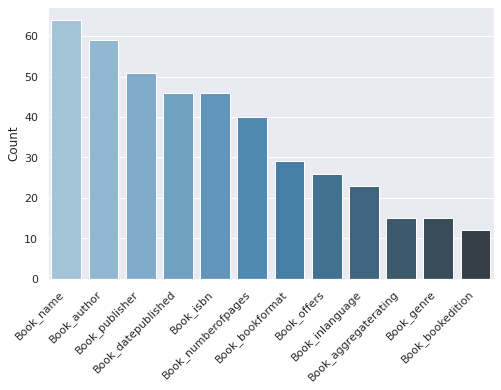

In [28]:
book = test.loc[:, test.columns.str.startswith('Book')]
book = book[book.index == 'Book']
book = book.transpose()
book.reset_index()
book = book.rename(columns={'Book':'Count'})
book = book.sort_values(by=['Count'], ascending=False)
display(book)
sns.set(rc={'figure.figsize':(8,5)})
plot = sns.barplot(data=book, x=book.index, y='Count', palette="Blues_d")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')


Class,Count
CreativeWork_author,817
CreativeWork_datemodified,810
CreativeWork_headline,809
CreativeWork_datepublished,733
CreativeWork_publisher,657
CreativeWork_name,570
CreativeWork_mainentityofpage,542
CreativeWork_interactionstatistic,122
CreativeWork_datecreated,104
CreativeWork_alternativeheadline,89


[Text(0, 0, 'CreativeWork_author'),
 Text(1, 0, 'CreativeWork_datemodified'),
 Text(2, 0, 'CreativeWork_headline'),
 Text(3, 0, 'CreativeWork_datepublished'),
 Text(4, 0, 'CreativeWork_publisher'),
 Text(5, 0, 'CreativeWork_name'),
 Text(6, 0, 'CreativeWork_mainentityofpage'),
 Text(7, 0, 'CreativeWork_interactionstatistic'),
 Text(8, 0, 'CreativeWork_datecreated'),
 Text(9, 0, 'CreativeWork_alternativeheadline'),
 Text(10, 0, 'CreativeWork_commentcount'),
 Text(11, 0, 'CreativeWork_interactiontype'),
 Text(12, 0, 'CreativeWork_articlebody'),
 Text(13, 0, 'CreativeWork_genre'),
 Text(14, 0, 'CreativeWork_inlanguage'),
 Text(15, 0, 'CreativeWork_version'),
 Text(16, 0, 'CreativeWork_copyrightyear'),
 Text(17, 0, 'CreativeWork_aggregaterating'),
 Text(18, 0, 'CreativeWork_keywords'),
 Text(19, 0, 'CreativeWork_copyrightholder'),
 Text(20, 0, 'CreativeWork_offers'),
 Text(21, 0, 'CreativeWork_interactioncount'),
 Text(22, 0, 'CreativeWork_creator')]

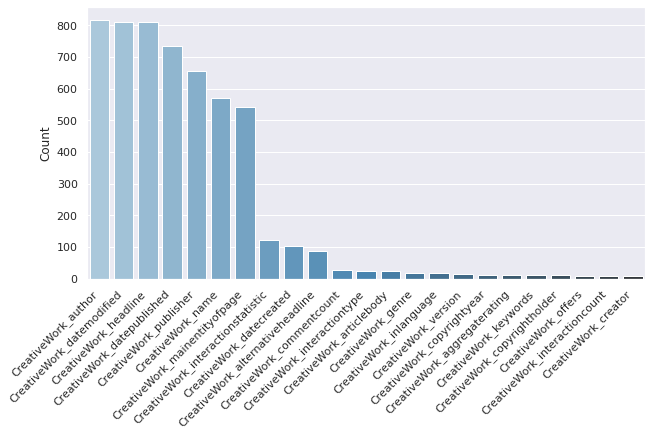

In [29]:
CW = test.loc[:, test.columns.str.startswith('CreativeWork')]
CW = CW[CW.index == 'CreativeWork']
CW = CW.transpose()
CW.reset_index()
CW = CW.rename(columns={'CreativeWork':'Count'})
CW = CW.sort_values(by=['Count'], ascending=False)
display(CW)
sns.set(rc={'figure.figsize':(10,5)})
plot = sns.barplot(data=CW, x=CW.index, y='Count', palette="Blues_d")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')


Class,Count
Product_name,3836
Product_offers,3697
Product_brand,3166
Product_mpn,1988
Product_aggregaterating,1669
Product_category,1055
Product_review,850
Product_manufacturer,694
Product_itemcondition,650
Product_model,604


[Text(0, 0, 'Product_name'),
 Text(1, 0, 'Product_offers'),
 Text(2, 0, 'Product_brand'),
 Text(3, 0, 'Product_mpn'),
 Text(4, 0, 'Product_aggregaterating'),
 Text(5, 0, 'Product_category'),
 Text(6, 0, 'Product_review'),
 Text(7, 0, 'Product_manufacturer'),
 Text(8, 0, 'Product_itemcondition'),
 Text(9, 0, 'Product_model'),
 Text(10, 0, 'Product_releasedate'),
 Text(11, 0, 'Product_color'),
 Text(12, 0, 'Product_weight'),
 Text(13, 0, 'Product_gtin13'),
 Text(14, 0, 'Product_price'),
 Text(15, 0, 'Product_gtin12'),
 Text(16, 0, 'Product_width'),
 Text(17, 0, 'Product_height'),
 Text(18, 0, 'Product_depth'),
 Text(19, 0, 'Product_additionalproperty'),
 Text(20, 0, 'Product_gtin8'),
 Text(21, 0, 'Product_mainentityofpage'),
 Text(22, 0, 'Product_gtin'),
 Text(23, 0, 'Product_isrelatedto'),
 Text(24, 0, 'Product_shop-currency'),
 Text(25, 0, 'Product_identifier'),
 Text(26, 0, 'Product_pricecurrency'),
 Text(27, 0, 'Product_ratingvalue'),
 Text(28, 0, 'Product_reviewcount'),
 Text(29, 0,

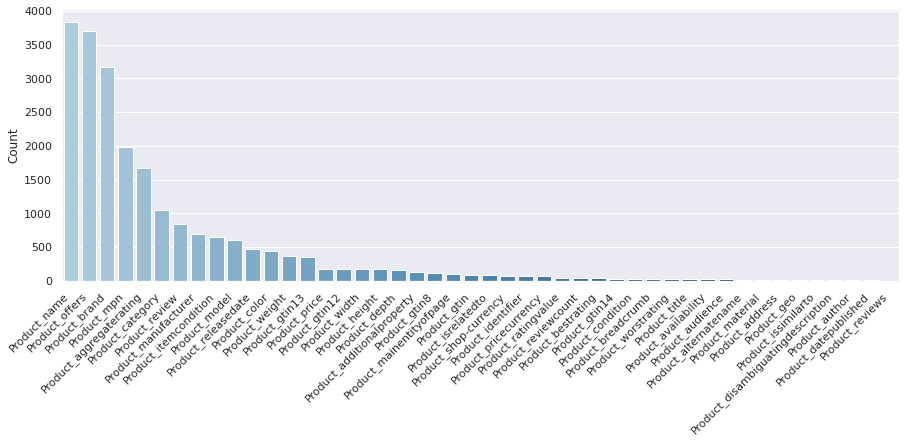

In [30]:
from matplotlib import pyplot as plt
product = test.loc[:, test.columns.str.startswith('Product')]
product = product[product.index == 'Product']
product = product.transpose()
product.reset_index()
product = product.rename(columns={'Product':'Count'})
product = product.sort_values(by=['Count'], ascending=False)
display(product)
sns.set(rc={'figure.figsize':(15,5)})
plot = sns.barplot(data=product, x=product.index, y='Count', palette="Blues_d")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

Class,Count
MusicRecording_name,1095
MusicRecording_duration,1075
MusicRecording_byartist,1024
MusicRecording_inalbum,924
MusicRecording_datepublished,23
MusicRecording_genre,15
MusicRecording_datecreated,12


[Text(0, 0, 'MusicRecording_name'),
 Text(1, 0, 'MusicRecording_duration'),
 Text(2, 0, 'MusicRecording_byartist'),
 Text(3, 0, 'MusicRecording_inalbum'),
 Text(4, 0, 'MusicRecording_datepublished'),
 Text(5, 0, 'MusicRecording_genre'),
 Text(6, 0, 'MusicRecording_datecreated')]

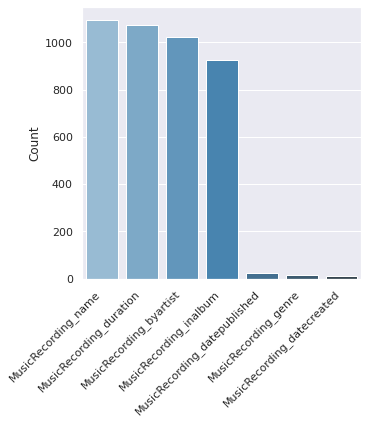

In [31]:
MusicRecording = test.loc[:, test.columns.str.startswith('MusicRecording')]
MusicRecording = MusicRecording[MusicRecording.index == 'MusicRecording']
MusicRecording = MusicRecording.transpose()
MusicRecording.reset_index()
MusicRecording = MusicRecording.rename(columns={'MusicRecording':'Count'})
MusicRecording = MusicRecording.sort_values(by=['Count'], ascending=False)
display(MusicRecording)
sns.set(rc={'figure.figsize':(5,5)})
plot = sns.barplot(data=MusicRecording, x=MusicRecording.index, y='Count', palette="Blues_d")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'Event_name'),
 Text(1, 0, 'Event_location'),
 Text(2, 0, 'Event_enddate'),
 Text(3, 0, 'Event_organizer'),
 Text(4, 0, 'Event_performer'),
 Text(5, 0, 'Event_eventstatus'),
 Text(6, 0, 'Event_eventattendancemode'),
 Text(7, 0, 'Event_performers'),
 Text(8, 0, 'Event_typicalagerange'),
 Text(9, 0, 'Event_doortime'),
 Text(10, 0, 'Event_duration')]

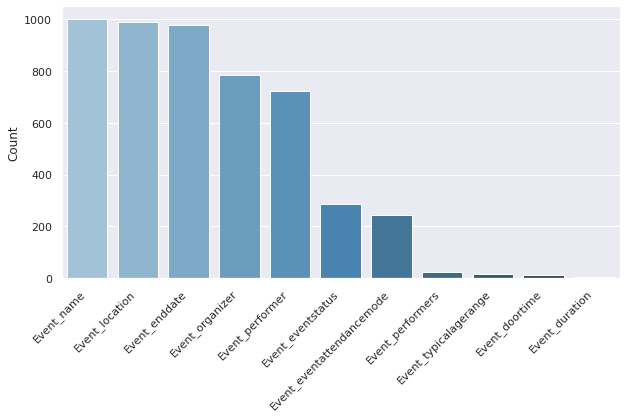

In [32]:
Event = test.loc[:, test.columns.str.startswith('Event')]
Event = Event[Event.index == 'Event']
Event = Event.transpose()
Event.reset_index()
Event = Event.rename(columns={'Event':'Count'})
Event = Event.sort_values(by=['Count'], ascending=False)
Event
sns.set(rc={'figure.figsize':(10,5)})
plot = sns.barplot(data=Event, x=Event.index, y='Count', palette="Blues_d")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'Recipe_name'),
 Text(1, 0, 'Recipe_recipeinstructions'),
 Text(2, 0, 'Recipe_author'),
 Text(3, 0, 'Recipe_recipeingredient'),
 Text(4, 0, 'Recipe_recipeyield'),
 Text(5, 0, 'Recipe_preptime'),
 Text(6, 0, 'Recipe_cooktime'),
 Text(7, 0, 'Recipe_datepublished'),
 Text(8, 0, 'Recipe_totaltime'),
 Text(9, 0, 'Recipe_recipecategory'),
 Text(10, 0, 'Recipe_recipecuisine'),
 Text(11, 0, 'Recipe_keywords'),
 Text(12, 0, 'Recipe_nutrition'),
 Text(13, 0, 'Recipe_aggregaterating'),
 Text(14, 0, 'Recipe_mainentityofpage'),
 Text(15, 0, 'Recipe_ispartof'),
 Text(16, 0, 'Recipe_ingredients'),
 Text(17, 0, 'Recipe_performtime'),
 Text(18, 0, 'Recipe_cookingmethod'),
 Text(19, 0, 'Recipe_suitablefordiet'),
 Text(20, 0, 'Recipe_datemodified'),
 Text(21, 0, 'Recipe_review'),
 Text(22, 0, 'Recipe_publisher'),
 Text(23, 0, 'Recipe_headline')]

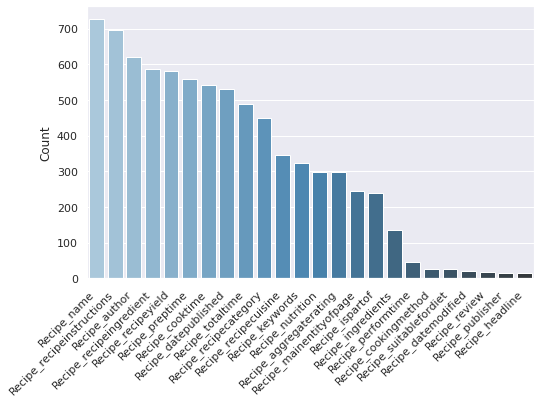

In [33]:
Recipe = test.loc[:, test.columns.str.startswith('Recipe')]
Recipe = Recipe[Recipe.index == 'Recipe']
Recipe = Recipe.transpose()
Recipe.reset_index()
Recipe = Recipe.rename(columns={'Recipe':'Count'})
Recipe = Recipe.sort_values(by=['Count'], ascending=False)
Recipe
sns.set(rc={'figure.figsize':(8,5)})
plot = sns.barplot(data=Recipe, x=Recipe.index, y='Count', palette="Blues_d")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'Person_birthdate'),
 Text(1, 0, 'Person_givenname'),
 Text(2, 0, 'Person_familyname'),
 Text(3, 0, 'Person_jobtitle'),
 Text(4, 0, 'Person_deathdate'),
 Text(5, 0, 'Person_additionalname'),
 Text(6, 0, 'Person_telephone'),
 Text(7, 0, 'Person_gender'),
 Text(8, 0, 'Person_email'),
 Text(9, 0, 'Person_worksfor'),
 Text(10, 0, 'Person_height'),
 Text(11, 0, 'Person_address'),
 Text(12, 0, 'Person_nationality'),
 Text(13, 0, 'Person_affiliation'),
 Text(14, 0, 'Person_weight'),
 Text(15, 0, 'Person_homelocation'),
 Text(16, 0, 'Person_knowslanguage'),
 Text(17, 0, 'Person_makesoffer'),
 Text(18, 0, 'Person_faxnumber'),
 Text(19, 0, 'Person_contactpoint'),
 Text(20, 0, 'Person_memberof'),
 Text(21, 0, 'Person_worklocation'),
 Text(22, 0, 'Person_birthplace'),
 Text(23, 0, 'Person_sameas')]

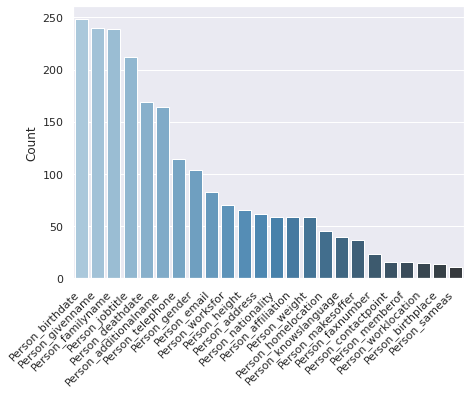

In [34]:
Person = test.loc[:, test.columns.str.startswith('Person')]
Person = Person[Person.index == 'Person']
Person = Person.transpose()
Person.reset_index()
Person = Person.rename(columns={'Person':'Count'})
Person = Person.sort_values(by=['Count'], ascending=False)
Person
sns.set(rc={'figure.figsize':(7,5)})
plot = sns.barplot(data=Person, x=Person.index, y='Count', palette="Blues_d")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'LocalBusiness_address'),
 Text(1, 0, 'LocalBusiness_name'),
 Text(2, 0, 'LocalBusiness_telephone'),
 Text(3, 0, 'LocalBusiness_geo'),
 Text(4, 0, 'LocalBusiness_pricerange'),
 Text(5, 0, 'LocalBusiness_email'),
 Text(6, 0, 'LocalBusiness_aggregaterating'),
 Text(7, 0, 'LocalBusiness_openinghours'),
 Text(8, 0, 'LocalBusiness_openinghoursspecification'),
 Text(9, 0, 'LocalBusiness_contactpoint'),
 Text(10, 0, 'LocalBusiness_sameas'),
 Text(11, 0, 'LocalBusiness_review'),
 Text(12, 0, 'LocalBusiness_faxnumber'),
 Text(13, 0, 'LocalBusiness_legalname'),
 Text(14, 0, 'LocalBusiness_addresslocality'),
 Text(15, 0, 'LocalBusiness_areaserved'),
 Text(16, 0, 'LocalBusiness_postalcode'),
 Text(17, 0, 'LocalBusiness_streetaddress'),
 Text(18, 0, 'LocalBusiness_addressregion'),
 Text(19, 0, 'LocalBusiness_citystatezip'),
 Text(20, 0, 'LocalBusiness_hasmap'),
 Text(21, 0, 'LocalBusiness_paymentaccepted'),
 Text(22, 0, 'LocalBusiness_location')]

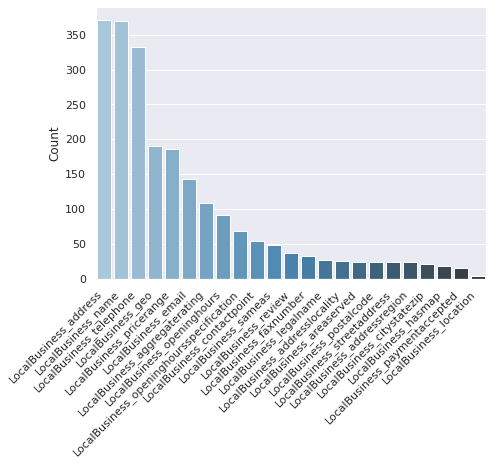

In [35]:
LocalBusiness = test.loc[:, test.columns.str.startswith('LocalBusiness')]
LocalBusiness = LocalBusiness[LocalBusiness.index == 'LocalBusiness']
LocalBusiness = LocalBusiness.transpose()
LocalBusiness.reset_index()
LocalBusiness = LocalBusiness.rename(columns={'LocalBusiness':'Count'})
LocalBusiness = LocalBusiness.sort_values(by=['Count'], ascending=False)
LocalBusiness
sns.set(rc={'figure.figsize':(7,5)})
plot = sns.barplot(data=LocalBusiness, x=LocalBusiness.index, y='Count', palette="Blues_d")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'Place_geo'),
 Text(1, 0, 'Place_name'),
 Text(2, 0, 'Place_telephone'),
 Text(3, 0, 'Place_sameas'),
 Text(4, 0, 'Place_openinghoursspecification')]

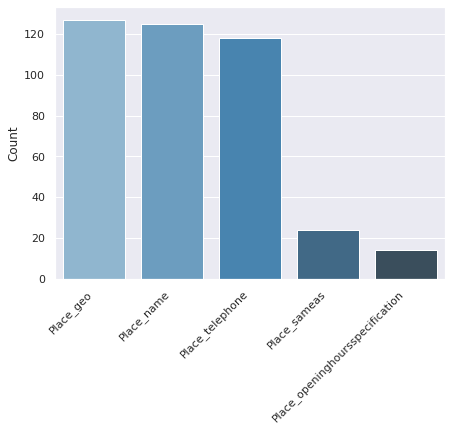

In [36]:
Place = test.loc[:, test.columns.str.startswith('Place')]
Place = Place[Place.index == 'Place']
Place = Place.transpose()
Place.reset_index()
Place = Place.rename(columns={'Place':'Count'})
Place = Place.sort_values(by=['Count'], ascending=False)
Place
sns.set(rc={'figure.figsize':(7,5)})
plot = sns.barplot(data=Place, x=Place.index, y='Count', palette="Blues_d")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'Hotel_name'),
 Text(1, 0, 'Hotel_address'),
 Text(2, 0, 'Hotel_telephone'),
 Text(3, 0, 'Hotel_geo'),
 Text(4, 0, 'Hotel_pricerange'),
 Text(5, 0, 'Hotel_aggregaterating'),
 Text(6, 0, 'Hotel_starrating'),
 Text(7, 0, 'Hotel_email')]

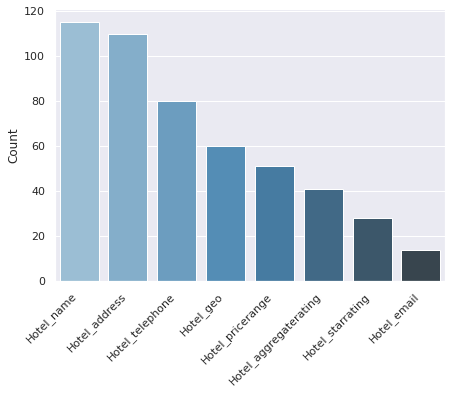

In [37]:
Hotel = test.loc[:, test.columns.str.startswith('Hotel')]
Hotel = Hotel[Hotel.index == 'Hotel']
Hotel = Hotel.transpose()
Hotel.reset_index()
Hotel = Hotel.rename(columns={'Hotel':'Count'})
Hotel = Hotel.sort_values(by=['Count'], ascending=False)
Hotel
sns.set(rc={'figure.figsize':(7,5)})
plot = sns.barplot(data=Hotel, x=Hotel.index, y='Count', palette="Blues_d")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'Restaurant_telephone'),
 Text(1, 0, 'Restaurant_address'),
 Text(2, 0, 'Restaurant_name'),
 Text(3, 0, 'Restaurant_servescuisine'),
 Text(4, 0, 'Restaurant_pricerange'),
 Text(5, 0, 'Restaurant_geo'),
 Text(6, 0, 'Restaurant_openinghours'),
 Text(7, 0, 'Restaurant_aggregaterating'),
 Text(8, 0, 'Restaurant_openinghoursspecification'),
 Text(9, 0, 'Restaurant_hasmenu'),
 Text(10, 0, 'Restaurant_acceptsreservations'),
 Text(11, 0, 'Restaurant_menu')]

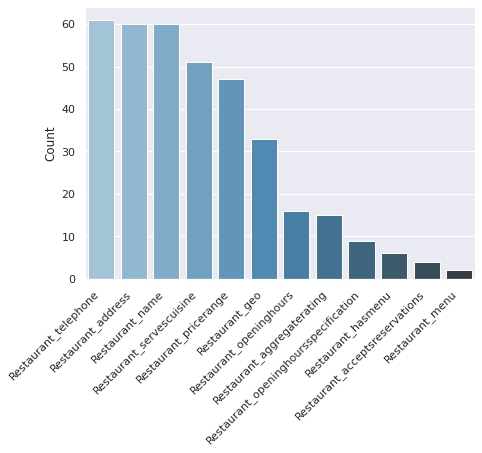

In [38]:
Restaurant = test.loc[:, test.columns.str.startswith('Restaurant')]
Restaurant = Restaurant[Restaurant.index == 'Restaurant']
Restaurant = Restaurant.transpose()
Restaurant.reset_index()
Restaurant = Restaurant.rename(columns={'Restaurant':'Count'})
Restaurant = Restaurant.sort_values(by=['Count'], ascending=False)
Restaurant
sns.set(rc={'figure.figsize':(7,5)})
plot = sns.barplot(data=Restaurant, x=Restaurant.index, y='Count', palette="Blues_d")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'MusicAlbum_name'),
 Text(1, 0, 'MusicAlbum_byartist'),
 Text(2, 0, 'MusicAlbum_track'),
 Text(3, 0, 'MusicAlbum_numtracks')]

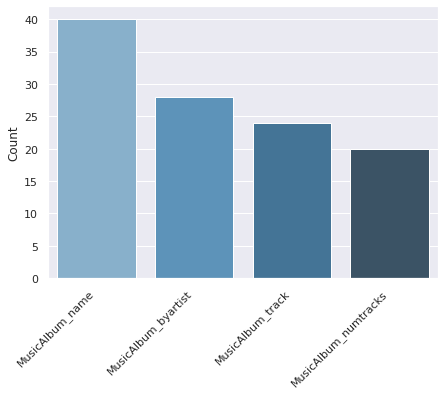

In [39]:
MusicAlbum = test.loc[:, test.columns.str.startswith('MusicAlbum')]
MusicAlbum = MusicAlbum[MusicAlbum.index == 'MusicAlbum']
MusicAlbum = MusicAlbum.transpose()
MusicAlbum.reset_index()
MusicAlbum = MusicAlbum.rename(columns={'MusicAlbum':'Count'})
MusicAlbum = MusicAlbum.sort_values(by=['Count'], ascending=False)
MusicAlbum
sns.set(rc={'figure.figsize':(7,5)})
plot = sns.barplot(data=MusicAlbum, x=MusicAlbum.index, y='Count', palette="Blues_d")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'TVEpisode_name'),
 Text(1, 0, 'TVEpisode_partofseries'),
 Text(2, 0, 'TVEpisode_episodenumber')]

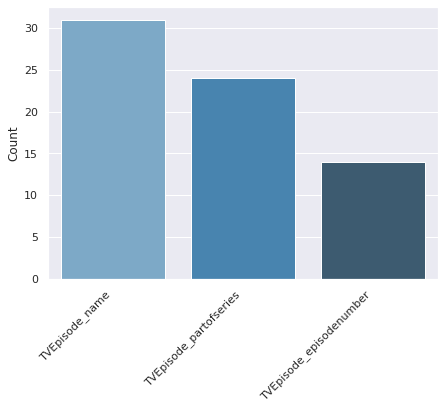

In [40]:
TVEpisode = test.loc[:, test.columns.str.startswith('TVEpisode')]
TVEpisode = TVEpisode[TVEpisode.index == 'TVEpisode']
TVEpisode = TVEpisode.transpose()
TVEpisode.reset_index()
TVEpisode = TVEpisode.rename(columns={'TVEpisode':'Count'})
TVEpisode = TVEpisode.sort_values(by=['Count'], ascending=False)
TVEpisode
sns.set(rc={'figure.figsize':(7,5)})
plot = sns.barplot(data=TVEpisode, x=TVEpisode.index, y='Count', palette="Blues_d")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

### Get statistics for large train set

In [43]:
#get statistics for large train set
large_train = pd.read_csv('../../../src/data/schemafiltereddata/TrainTestTables/Large/Training_Files.csv')
large_train = large_train.groupby('Class').agg(lambda x : x.sum() if x.dtype=='int64' else x.head(1))
large_train

,Unnamed: 0,filename,num_rows,num_columns,num_columns_selected,num_NAs,percentage_col_NA,percentage_table_NA,sum_NA_sel_col,Book_aggregaterating,...,Restaurant_openinghoursspecification,Restaurant_pricerange,Restaurant_servescuisine,Restaurant_telephone,TVEpisode_episodenumber,TVEpisode_name,TVEpisode_partofseries,Small,Medium,Large
Class,,,,,,,,,,,,,,,,,,,,,
Book,177493,Book_12min.com_September2020.json.gz,366.0,9.0,5.0,314250,0.286885,0.090710,830.0,115,...,0,0,0,0,0,0,0,0.0,0.0,1.0
CreativeWork,11972501,CreativeWork_0en-hp.com_September2020.json.gz,60.0,10.0,7.0,65858,0.083333,0.047619,140.0,0,...,0,0,0,0,0,0,0,0.0,1.0,0.0
Event,37534042,Event_08tickets.com_September2020.json.gz,135.0,13.0,7.0,123518,0.000000,0.000000,0.0,0,...,0,0,0,0,0,0,0,0.0,1.0,0.0
Hotel,8025311,Hotel_10best.com_September2020.json.gz,227.0,7.0,5.0,55072,0.242291,0.048458,275.0,0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
LocalBusiness,29215623,LocalBusiness_1000ecofarms.com_September2020.j...,211.0,10.0,5.0,194681,0.170616,0.034123,180.0,0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
MusicAlbum,2773857,MusicAlbum_20rap.com_September2020.json.gz,73.0,9.0,3.0,5790,0.000000,0.000000,0.0,0,...,0,0,0,0,0,0,0,0.0,1.0,0.0
MusicRecording,89889130,MusicRecording_1001tracklists.com_September202...,4364.0,7.0,3.0,74717,0.256874,0.085625,3363.0,0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
Person,71888974,Person_0escorts.com_September2020.json.gz,403.0,6.0,3.0,230990,0.000000,0.000000,0.0,0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
Place,18356271,Place_365thingsinhouston.com_September2020.jso...,493.0,8.0,4.0,25988,0.440162,0.186105,1468.0,0,...,0,0,0,0,0,0,0,0.0,0.0,1.0


Class,Count
Book_name,528
Book_author,491
Book_isbn,432
Book_datepublished,383
Book_publisher,375
Book_numberofpages,352
Book_offers,274
Book_bookformat,231
Book_inlanguage,168
Book_genre,139


[Text(0, 0, 'Book_name'),
 Text(1, 0, 'Book_author'),
 Text(2, 0, 'Book_isbn'),
 Text(3, 0, 'Book_datepublished'),
 Text(4, 0, 'Book_publisher'),
 Text(5, 0, 'Book_numberofpages'),
 Text(6, 0, 'Book_offers'),
 Text(7, 0, 'Book_bookformat'),
 Text(8, 0, 'Book_inlanguage'),
 Text(9, 0, 'Book_genre'),
 Text(10, 0, 'Book_aggregaterating'),
 Text(11, 0, 'Book_bookedition')]

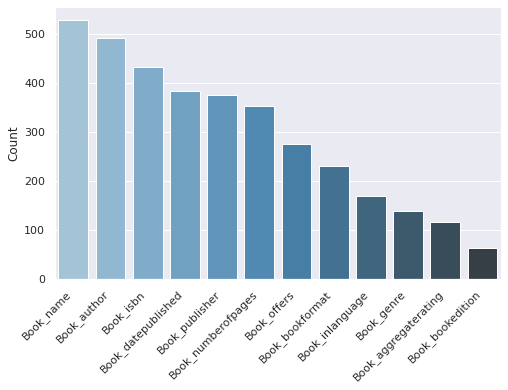

In [44]:
#get count of each column within the large train set for class Book
book_tr = large_train.loc[:, large_train.columns.str.startswith('Book')]
book_tr = book_tr[book_tr.index == 'Book']
book_tr = book_tr.transpose()
book_tr.reset_index()
book_tr = book_tr.rename(columns={'Book':'Count'})
book_tr = book_tr.sort_values(by=['Count'], ascending=False)
display(book_tr)
sns.set(rc={'figure.figsize':(8,5)})
plot = sns.barplot(data=book_tr, x=book_tr.index, y='Count', palette="Blues_d")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

Class,Count
CreativeWork_author,3695
CreativeWork_headline,3678
CreativeWork_datemodified,3670
CreativeWork_datepublished,3302
CreativeWork_publisher,2985
CreativeWork_name,2599
CreativeWork_mainentityofpage,2470
CreativeWork_interactionstatistic,554
CreativeWork_datecreated,475
CreativeWork_alternativeheadline,406


[Text(0, 0, 'CreativeWork_author'),
 Text(1, 0, 'CreativeWork_headline'),
 Text(2, 0, 'CreativeWork_datemodified'),
 Text(3, 0, 'CreativeWork_datepublished'),
 Text(4, 0, 'CreativeWork_publisher'),
 Text(5, 0, 'CreativeWork_name'),
 Text(6, 0, 'CreativeWork_mainentityofpage'),
 Text(7, 0, 'CreativeWork_interactionstatistic'),
 Text(8, 0, 'CreativeWork_datecreated'),
 Text(9, 0, 'CreativeWork_alternativeheadline'),
 Text(10, 0, 'CreativeWork_commentcount'),
 Text(11, 0, 'CreativeWork_interactiontype'),
 Text(12, 0, 'CreativeWork_articlebody'),
 Text(13, 0, 'CreativeWork_genre'),
 Text(14, 0, 'CreativeWork_inlanguage'),
 Text(15, 0, 'CreativeWork_version'),
 Text(16, 0, 'CreativeWork_aggregaterating'),
 Text(17, 0, 'CreativeWork_copyrightyear'),
 Text(18, 0, 'CreativeWork_keywords'),
 Text(19, 0, 'CreativeWork_copyrightholder'),
 Text(20, 0, 'CreativeWork_offers'),
 Text(21, 0, 'CreativeWork_interactioncount'),
 Text(22, 0, 'CreativeWork_creator')]

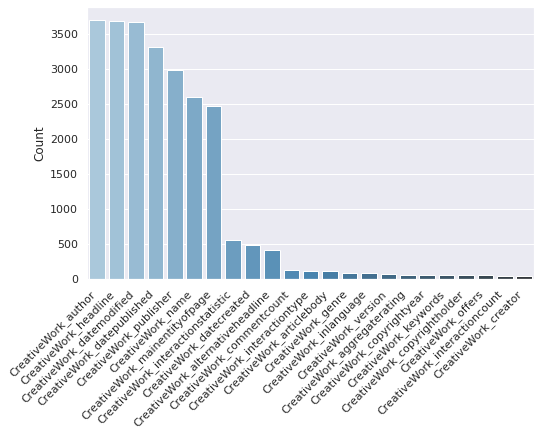

In [45]:
#get count of each column within the large train set for class Creative Work
CW_tr = large_train.loc[:, large_train.columns.str.startswith('CreativeWork')]
CW_tr = CW_tr[CW_tr.index == 'CreativeWork']
CW_tr = CW_tr.transpose()
CW_tr.reset_index()
CW_tr = CW_tr.rename(columns={'CreativeWork':'Count'})
CW_tr = CW_tr.sort_values(by=['Count'], ascending=False)
display(CW_tr)
sns.set(rc={'figure.figsize':(8,5)})
plot = sns.barplot(data=CW_tr, x=CW_tr.index, y='Count', palette="Blues_d")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

Class,Count
Event_name,4563
Event_location,4521
Event_enddate,4455
Event_organizer,3573
Event_performer,3359
Event_eventstatus,1299
Event_eventattendancemode,1105
Event_performers,108
Event_typicalagerange,73
Event_doortime,54


[Text(0, 0, 'Event_name'),
 Text(1, 0, 'Event_location'),
 Text(2, 0, 'Event_enddate'),
 Text(3, 0, 'Event_organizer'),
 Text(4, 0, 'Event_performer'),
 Text(5, 0, 'Event_eventstatus'),
 Text(6, 0, 'Event_eventattendancemode'),
 Text(7, 0, 'Event_performers'),
 Text(8, 0, 'Event_typicalagerange'),
 Text(9, 0, 'Event_doortime'),
 Text(10, 0, 'Event_duration')]

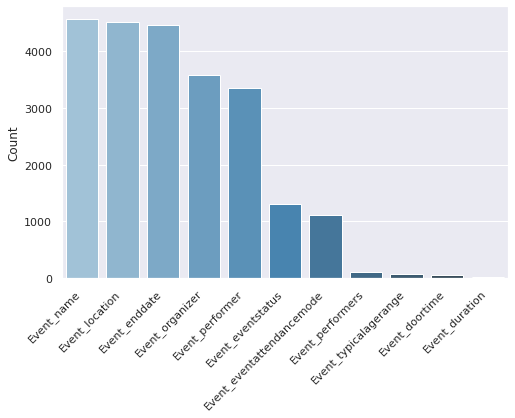

In [46]:
#get count of each column within the large train set for class Event
event_tr = large_train.loc[:, large_train.columns.str.startswith('Event')]
event_tr = event_tr[event_tr.index == 'Event']
event_tr = event_tr.transpose()
event_tr.reset_index()
event_tr = event_tr.rename(columns={'Event':'Count'})
event_tr = event_tr.sort_values(by=['Count'], ascending=False)
display(event_tr)
sns.set(rc={'figure.figsize':(8,5)})
plot = sns.barplot(data=event_tr, x=event_tr.index, y='Count', palette="Blues_d")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

Class,Count
Hotel_name,693
Hotel_address,663
Hotel_telephone,495
Hotel_pricerange,329
Hotel_geo,324
Hotel_aggregaterating,278
Hotel_starrating,146
Hotel_email,82


[Text(0, 0, 'Hotel_name'),
 Text(1, 0, 'Hotel_address'),
 Text(2, 0, 'Hotel_telephone'),
 Text(3, 0, 'Hotel_pricerange'),
 Text(4, 0, 'Hotel_geo'),
 Text(5, 0, 'Hotel_aggregaterating'),
 Text(6, 0, 'Hotel_starrating'),
 Text(7, 0, 'Hotel_email')]

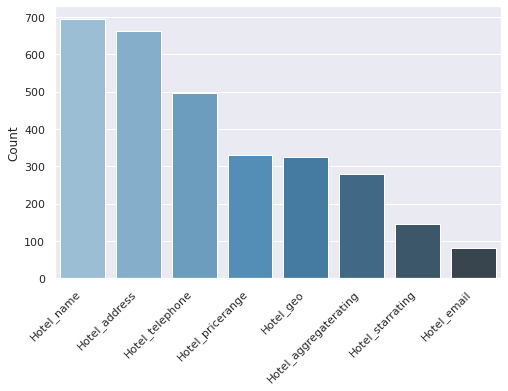

In [47]:
#get count of each column within the large train set for class Hotel
hotel_tr = large_train.loc[:, large_train.columns.str.startswith('Hotel')]
hotel_tr = hotel_tr[hotel_tr.index == 'Hotel']
hotel_tr = hotel_tr.transpose()
hotel_tr.reset_index()
hotel_tr = hotel_tr.rename(columns={'Hotel':'Count'})
hotel_tr = hotel_tr.sort_values(by=['Count'], ascending=False)
display(hotel_tr)
sns.set(rc={'figure.figsize':(8,5)})
plot = sns.barplot(data=hotel_tr, x=hotel_tr.index, y='Count', palette="Blues_d")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

Class,Count
LocalBusiness_name,2169
LocalBusiness_address,2164
LocalBusiness_telephone,1988
LocalBusiness_geo,1202
LocalBusiness_pricerange,1137
LocalBusiness_email,824
LocalBusiness_aggregaterating,669
LocalBusiness_openinghours,524
LocalBusiness_openinghoursspecification,504
LocalBusiness_contactpoint,344


[Text(0, 0, 'LocalBusiness_name'),
 Text(1, 0, 'LocalBusiness_address'),
 Text(2, 0, 'LocalBusiness_telephone'),
 Text(3, 0, 'LocalBusiness_geo'),
 Text(4, 0, 'LocalBusiness_pricerange'),
 Text(5, 0, 'LocalBusiness_email'),
 Text(6, 0, 'LocalBusiness_aggregaterating'),
 Text(7, 0, 'LocalBusiness_openinghours'),
 Text(8, 0, 'LocalBusiness_openinghoursspecification'),
 Text(9, 0, 'LocalBusiness_contactpoint'),
 Text(10, 0, 'LocalBusiness_sameas'),
 Text(11, 0, 'LocalBusiness_faxnumber'),
 Text(12, 0, 'LocalBusiness_review'),
 Text(13, 0, 'LocalBusiness_areaserved'),
 Text(14, 0, 'LocalBusiness_legalname'),
 Text(15, 0, 'LocalBusiness_addresslocality'),
 Text(16, 0, 'LocalBusiness_addressregion'),
 Text(17, 0, 'LocalBusiness_postalcode'),
 Text(18, 0, 'LocalBusiness_streetaddress'),
 Text(19, 0, 'LocalBusiness_citystatezip'),
 Text(20, 0, 'LocalBusiness_paymentaccepted'),
 Text(21, 0, 'LocalBusiness_hasmap'),
 Text(22, 0, 'LocalBusiness_location')]

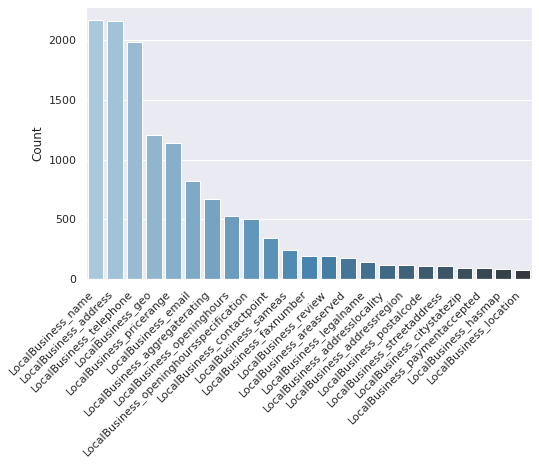

In [48]:
#get count of each column within the large train set for class LocalBusiness
LB_tr = large_train.loc[:, large_train.columns.str.startswith('LocalBusiness')]
LB_tr = LB_tr[LB_tr.index == 'LocalBusiness']
LB_tr = LB_tr.transpose()
LB_tr.reset_index()
LB_tr = LB_tr.rename(columns={'LocalBusiness':'Count'})
LB_tr = LB_tr.sort_values(by=['Count'], ascending=False)
display(LB_tr)
sns.set(rc={'figure.figsize':(8,5)})
plot = sns.barplot(data=LB_tr, x=LB_tr.index, y='Count', palette="Blues_d")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

Class,Count
MusicAlbum_name,183
MusicAlbum_byartist,137
MusicAlbum_track,113
MusicAlbum_numtracks,91


[Text(0, 0, 'MusicAlbum_name'),
 Text(1, 0, 'MusicAlbum_byartist'),
 Text(2, 0, 'MusicAlbum_track'),
 Text(3, 0, 'MusicAlbum_numtracks')]

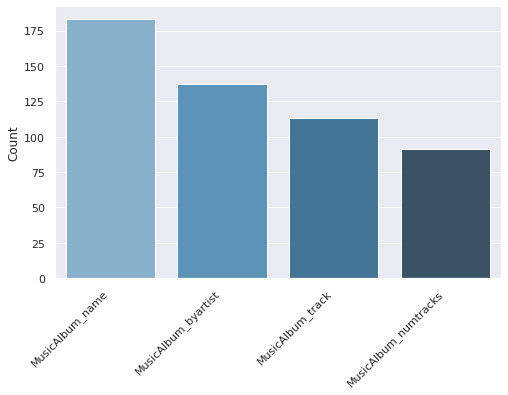

In [49]:
#get count of each column within the large train set for class Music Album
MA_tr = large_train.loc[:, large_train.columns.str.startswith('MusicAlbum')]
MA_tr = MA_tr[MA_tr.index == 'MusicAlbum']
MA_tr = MA_tr.transpose()
MA_tr.reset_index()
MA_tr = MA_tr.rename(columns={'MusicAlbum':'Count'})
MA_tr = MA_tr.sort_values(by=['Count'], ascending=False)
display(MA_tr)
sns.set(rc={'figure.figsize':(8,5)})
plot = sns.barplot(data=MA_tr, x=MA_tr.index, y='Count', palette="Blues_d")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

Class,Count
MusicRecording_name,5027
MusicRecording_duration,4909
MusicRecording_byartist,4715
MusicRecording_inalbum,4237
MusicRecording_datepublished,111
MusicRecording_genre,77
MusicRecording_datecreated,59


[Text(0, 0, 'MusicRecording_name'),
 Text(1, 0, 'MusicRecording_duration'),
 Text(2, 0, 'MusicRecording_byartist'),
 Text(3, 0, 'MusicRecording_inalbum'),
 Text(4, 0, 'MusicRecording_datepublished'),
 Text(5, 0, 'MusicRecording_genre'),
 Text(6, 0, 'MusicRecording_datecreated')]

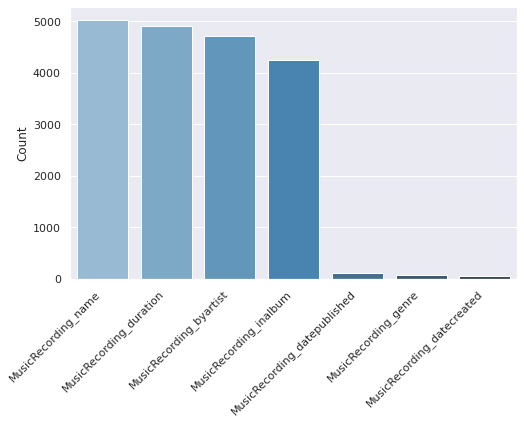

In [50]:
#get count of each column within the large train set for class Music Recording
MR_tr = large_train.loc[:, large_train.columns.str.startswith('MusicRecording')]
MR_tr = MR_tr[MR_tr.index == 'MusicRecording']
MR_tr = MR_tr.transpose()
MR_tr.reset_index()
MR_tr = MR_tr.rename(columns={'MusicRecording':'Count'})
MR_tr = MR_tr.sort_values(by=['Count'], ascending=False)
display(MR_tr)
sns.set(rc={'figure.figsize':(8,5)})
plot = sns.barplot(data=MR_tr, x=MR_tr.index, y='Count', palette="Blues_d")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

Class,Count
Person_birthdate,1144
Person_givenname,1100
Person_familyname,1080
Person_telephone,1073
Person_jobtitle,1027
Person_email,945
Person_deathdate,775
Person_additionalname,753
Person_gender,532
Person_height,346


[Text(0, 0, 'Person_birthdate'),
 Text(1, 0, 'Person_givenname'),
 Text(2, 0, 'Person_familyname'),
 Text(3, 0, 'Person_telephone'),
 Text(4, 0, 'Person_jobtitle'),
 Text(5, 0, 'Person_email'),
 Text(6, 0, 'Person_deathdate'),
 Text(7, 0, 'Person_additionalname'),
 Text(8, 0, 'Person_gender'),
 Text(9, 0, 'Person_height'),
 Text(10, 0, 'Person_worksfor'),
 Text(11, 0, 'Person_nationality'),
 Text(12, 0, 'Person_weight'),
 Text(13, 0, 'Person_address'),
 Text(14, 0, 'Person_affiliation'),
 Text(15, 0, 'Person_homelocation'),
 Text(16, 0, 'Person_knowslanguage'),
 Text(17, 0, 'Person_makesoffer'),
 Text(18, 0, 'Person_faxnumber'),
 Text(19, 0, 'Person_sameas'),
 Text(20, 0, 'Person_memberof'),
 Text(21, 0, 'Person_contactpoint'),
 Text(22, 0, 'Person_worklocation'),
 Text(23, 0, 'Person_birthplace')]

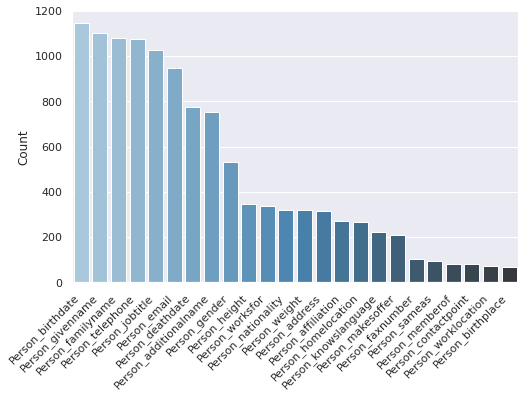

In [51]:
#get count of each column within the large train set for class Person
person_tr = large_train.loc[:, large_train.columns.str.startswith('Person')]
person_tr = person_tr[person_tr.index == 'Person']
person_tr = person_tr.transpose()
person_tr.reset_index()
person_tr = person_tr.rename(columns={'Person':'Count'})
person_tr = person_tr.sort_values(by=['Count'], ascending=False)
display(person_tr)
sns.set(rc={'figure.figsize':(8,5)})
plot = sns.barplot(data=person_tr, x=person_tr.index, y='Count', palette="Blues_d")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

Class,Count
Place_name,706
Place_geo,667
Place_telephone,633
Place_sameas,186
Place_openinghoursspecification,71


[Text(0, 0, 'Place_name'),
 Text(1, 0, 'Place_geo'),
 Text(2, 0, 'Place_telephone'),
 Text(3, 0, 'Place_sameas'),
 Text(4, 0, 'Place_openinghoursspecification')]

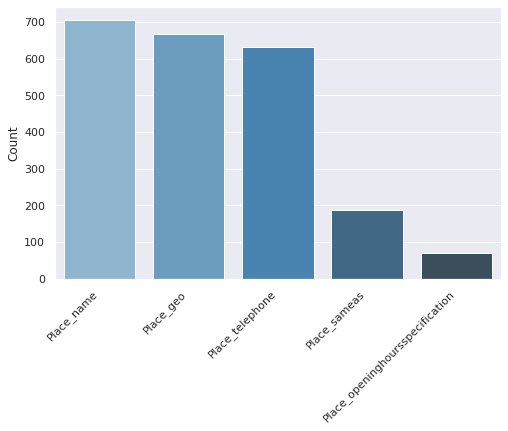

In [52]:
#get count of each column within the large train set for class Place
place_tr = large_train.loc[:, large_train.columns.str.startswith('Place')]
place_tr = place_tr[place_tr.index == 'Place']
place_tr = place_tr.transpose()
place_tr.reset_index()
place_tr = place_tr.rename(columns={'Place':'Count'})
place_tr = place_tr.sort_values(by=['Count'], ascending=False)
display(place_tr)
sns.set(rc={'figure.figsize':(8,5)})
plot = sns.barplot(data=place_tr, x=place_tr.index, y='Count', palette="Blues_d")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

Class,Count
Product_name,19345
Product_offers,18611
Product_brand,15807
Product_mpn,9912
Product_aggregaterating,8357
Product_category,5336
Product_review,4129
Product_manufacturer,3523
Product_itemcondition,3180
Product_model,3018


[Text(0, 0, 'Product_name'),
 Text(1, 0, 'Product_offers'),
 Text(2, 0, 'Product_brand'),
 Text(3, 0, 'Product_mpn'),
 Text(4, 0, 'Product_aggregaterating'),
 Text(5, 0, 'Product_category'),
 Text(6, 0, 'Product_review'),
 Text(7, 0, 'Product_manufacturer'),
 Text(8, 0, 'Product_itemcondition'),
 Text(9, 0, 'Product_model'),
 Text(10, 0, 'Product_releasedate'),
 Text(11, 0, 'Product_color'),
 Text(12, 0, 'Product_weight'),
 Text(13, 0, 'Product_gtin13'),
 Text(14, 0, 'Product_price'),
 Text(15, 0, 'Product_width'),
 Text(16, 0, 'Product_height'),
 Text(17, 0, 'Product_gtin12'),
 Text(18, 0, 'Product_depth'),
 Text(19, 0, 'Product_additionalproperty'),
 Text(20, 0, 'Product_gtin8'),
 Text(21, 0, 'Product_mainentityofpage'),
 Text(22, 0, 'Product_isrelatedto'),
 Text(23, 0, 'Product_shop-currency'),
 Text(24, 0, 'Product_gtin'),
 Text(25, 0, 'Product_identifier'),
 Text(26, 0, 'Product_pricecurrency'),
 Text(27, 0, 'Product_ratingvalue'),
 Text(28, 0, 'Product_condition'),
 Text(29, 0, '

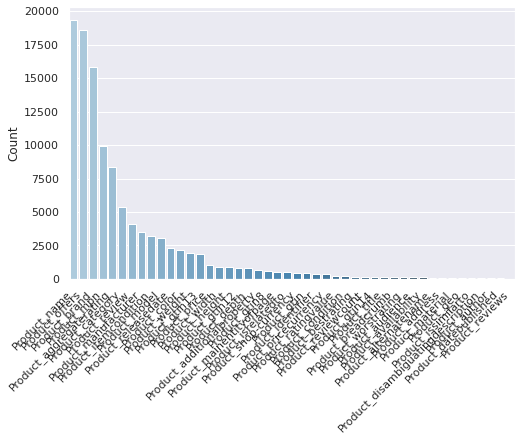

In [53]:
#get count of each column within the large train set for class Product
product_tr = large_train.loc[:, large_train.columns.str.startswith('Product')]
product_tr = product_tr[product_tr.index == 'Product']
product_tr = product_tr.transpose()
product_tr.reset_index()
product_tr = product_tr.rename(columns={'Product':'Count'})
product_tr = product_tr.sort_values(by=['Count'], ascending=False)
display(product_tr)
sns.set(rc={'figure.figsize':(8,5)})
plot = sns.barplot(data=product_tr, x=product_tr.index, y='Count', palette="Blues_d")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

Class,Count
Recipe_name,3513
Recipe_recipeinstructions,3325
Recipe_author,2993
Recipe_recipeingredient,2780
Recipe_recipeyield,2771
Recipe_preptime,2683
Recipe_cooktime,2607
Recipe_datepublished,2543
Recipe_totaltime,2344
Recipe_recipecategory,2163


[Text(0, 0, 'Recipe_name'),
 Text(1, 0, 'Recipe_recipeinstructions'),
 Text(2, 0, 'Recipe_author'),
 Text(3, 0, 'Recipe_recipeingredient'),
 Text(4, 0, 'Recipe_recipeyield'),
 Text(5, 0, 'Recipe_preptime'),
 Text(6, 0, 'Recipe_cooktime'),
 Text(7, 0, 'Recipe_datepublished'),
 Text(8, 0, 'Recipe_totaltime'),
 Text(9, 0, 'Recipe_recipecategory'),
 Text(10, 0, 'Recipe_recipecuisine'),
 Text(11, 0, 'Recipe_keywords'),
 Text(12, 0, 'Recipe_aggregaterating'),
 Text(13, 0, 'Recipe_nutrition'),
 Text(14, 0, 'Recipe_mainentityofpage'),
 Text(15, 0, 'Recipe_ispartof'),
 Text(16, 0, 'Recipe_ingredients'),
 Text(17, 0, 'Recipe_performtime'),
 Text(18, 0, 'Recipe_suitablefordiet'),
 Text(19, 0, 'Recipe_cookingmethod'),
 Text(20, 0, 'Recipe_datemodified'),
 Text(21, 0, 'Recipe_publisher'),
 Text(22, 0, 'Recipe_review'),
 Text(23, 0, 'Recipe_headline')]

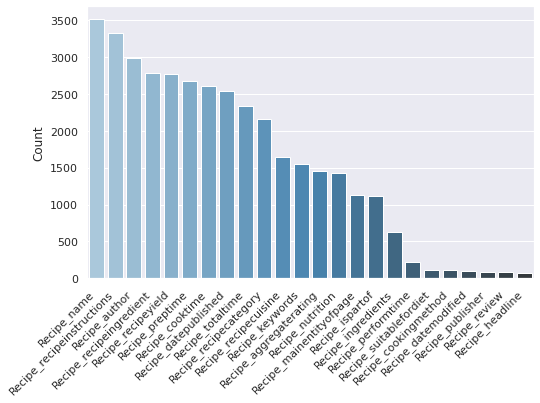

In [54]:
#get count of each column within the large train set for class Recipe
recipe_tr = large_train.loc[:, large_train.columns.str.startswith('Recipe')]
recipe_tr = recipe_tr[recipe_tr.index == 'Recipe']
recipe_tr = recipe_tr.transpose()
recipe_tr.reset_index()
recipe_tr = recipe_tr.rename(columns={'Recipe':'Count'})
recipe_tr = recipe_tr.sort_values(by=['Count'], ascending=False)
display(recipe_tr)
sns.set(rc={'figure.figsize':(8,5)})
plot = sns.barplot(data=recipe_tr, x=recipe_tr.index, y='Count', palette="Blues_d")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

Class,Count
Restaurant_name,353
Restaurant_address,351
Restaurant_telephone,337
Restaurant_servescuisine,300
Restaurant_pricerange,279
Restaurant_geo,226
Restaurant_aggregaterating,121
Restaurant_hasmenu,86
Restaurant_acceptsreservations,76
Restaurant_openinghoursspecification,71


[Text(0, 0, 'Restaurant_name'),
 Text(1, 0, 'Restaurant_address'),
 Text(2, 0, 'Restaurant_telephone'),
 Text(3, 0, 'Restaurant_servescuisine'),
 Text(4, 0, 'Restaurant_pricerange'),
 Text(5, 0, 'Restaurant_geo'),
 Text(6, 0, 'Restaurant_aggregaterating'),
 Text(7, 0, 'Restaurant_hasmenu'),
 Text(8, 0, 'Restaurant_acceptsreservations'),
 Text(9, 0, 'Restaurant_openinghoursspecification'),
 Text(10, 0, 'Restaurant_openinghours'),
 Text(11, 0, 'Restaurant_menu')]

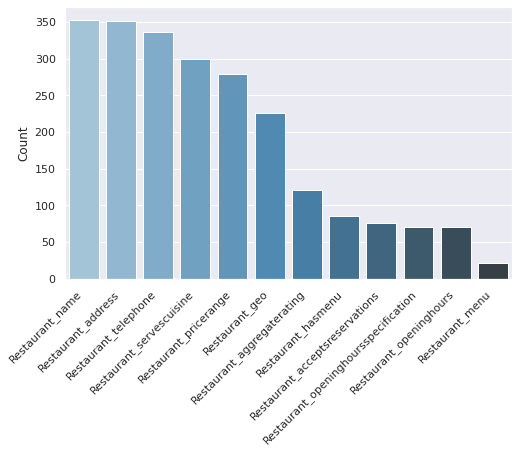

In [55]:
#get count of each column within the large train set for class Restaurant
restaurant_tr = large_train.loc[:, large_train.columns.str.startswith('Restaurant')]
restaurant_tr = restaurant_tr[restaurant_tr.index == 'Restaurant']
restaurant_tr = restaurant_tr.transpose()
restaurant_tr.reset_index()
restaurant_tr = restaurant_tr.rename(columns={'Restaurant':'Count'})
restaurant_tr = restaurant_tr.sort_values(by=['Count'], ascending=False)
display(restaurant_tr)
sns.set(rc={'figure.figsize':(8,5)})
plot = sns.barplot(data=restaurant_tr, x=restaurant_tr.index, y='Count', palette="Blues_d")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

Class,Count
TVEpisode_name,162
TVEpisode_partofseries,126
TVEpisode_episodenumber,82


[Text(0, 0, 'TVEpisode_name'),
 Text(1, 0, 'TVEpisode_partofseries'),
 Text(2, 0, 'TVEpisode_episodenumber')]

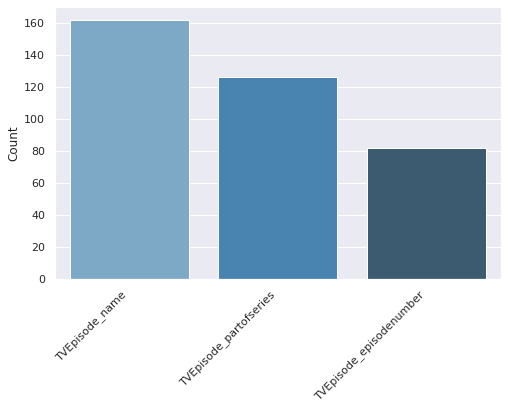

In [56]:
#get count of each column within the large train set for class TVEpisode
tv_tr = large_train.loc[:, large_train.columns.str.startswith('TVEpisode')]
tv_tr = tv_tr[tv_tr.index == 'TVEpisode']
tv_tr = tv_tr.transpose()
tv_tr.reset_index()
tv_tr = tv_tr.rename(columns={'TVEpisode':'Count'})
tv_tr = tv_tr.sort_values(by=['Count'], ascending=False)
display(tv_tr)
sns.set(rc={'figure.figsize':(8,5)})
plot = sns.barplot(data=tv_tr, x=tv_tr.index, y='Count', palette="Blues_d")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

### Get statistics for medium train tables - TV Episode & MusicAlbum

In [57]:
#get statistics for large train set
medium_train = pd.read_csv('../../../src/data/schemafiltereddata/TrainTestTables/Medium/MTrain_Files.csv')
medium_train = medium_train.groupby('Class').agg(lambda x : x.sum() if x.dtype=='int64' else x.head(1))
medium_train

,Unnamed: 0,filename,num_rows,num_columns,num_columns_selected,num_NAs,percentage_col_NA,percentage_table_NA,sum_NA_sel_col,Book_aggregaterating,...,Restaurant_openinghoursspecification,Restaurant_pricerange,Restaurant_servescuisine,Restaurant_telephone,TVEpisode_episodenumber,TVEpisode_name,TVEpisode_partofseries,Small,Medium,Large
Class,,,,,,,,,,,,,,,,,,,,,
Book,38969,Book_2d-market.com_September2020.json.gz,262.0,19.0,7.0,86081,0.129771,0.041439,532.0,25,...,0,0,0,0,0,0,0,0.0,0.0,1.0
CreativeWork,2691479,CreativeWork_1000museums.com_September2020.jso...,68.0,10.0,6.0,8321,0.382353,0.063725,156.0,0,...,0,0,0,0,0,0,0,0.0,1.0,0.0
Event,8338116,Event_312area.com_September2020.json.gz,44.0,9.0,5.0,25276,0.159091,0.063636,70.0,0,...,0,0,0,0,0,0,0,0.0,1.0,0.0
Hotel,1787809,Hotel_1stquest.com_September2020.json.gz,255.0,8.0,5.0,16136,0.266667,0.054902,350.0,0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
LocalBusiness,6502123,LocalBusiness_11880-gebaeudereinigung.com_Sept...,48.0,10.0,7.0,44928,0.437500,0.172619,406.0,0,...,0,0,0,0,0,0,0,0.0,1.0,0.0
MusicAlbum,601843,MusicAlbum_7digital.com_September2020.json.gz,45259.0,6.0,2.0,1649,0.000000,0.000000,0.0,0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
MusicRecording,19705843,MusicRecording_10westmusic.com_September2020.j...,10.0,5.0,3.0,5910,0.000000,0.000000,0.0,0,...,0,0,0,0,0,0,0,1.0,0.0,0.0
Person,15785380,Person_0escorts.com_September2020.json.gz,403.0,6.0,3.0,36883,0.000000,0.000000,0.0,0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
Place,4035424,Place_abaton.com_September2020.json.gz,86.0,7.0,3.0,3650,0.395349,0.131783,102.0,0,...,0,0,0,0,0,0,0,0.0,1.0,0.0


Class,Count
TVEpisode_name,38
TVEpisode_partofseries,28
TVEpisode_episodenumber,18


[Text(0, 0, 'TVEpisode_name'),
 Text(1, 0, 'TVEpisode_partofseries'),
 Text(2, 0, 'TVEpisode_episodenumber')]

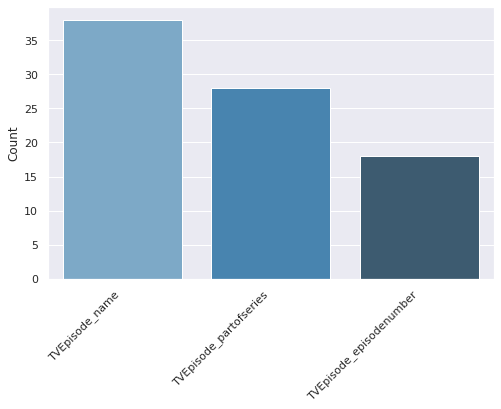

In [59]:
#get count of each column within the medium train set for tv episode
tv_tr = medium_train.loc[:, medium_train.columns.str.startswith('TVEpisode')]
tv_tr = tv_tr[tv_tr.index == 'TVEpisode']
tv_tr = tv_tr.transpose()
tv_tr.reset_index()
tv_tr = tv_tr.rename(columns={'TVEpisode':'Count'})
tv_tr = tv_tr.sort_values(by=['Count'], ascending=False)
display(tv_tr)
sns.set(rc={'figure.figsize':(8,5)})
plot = sns.barplot(data=tv_tr, x=tv_tr.index, y='Count', palette="Blues_d")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

Class,Count
MusicAlbum_name,40
MusicAlbum_byartist,30
MusicAlbum_track,25
MusicAlbum_numtracks,20


[Text(0, 0, 'MusicAlbum_name'),
 Text(1, 0, 'MusicAlbum_byartist'),
 Text(2, 0, 'MusicAlbum_track'),
 Text(3, 0, 'MusicAlbum_numtracks')]

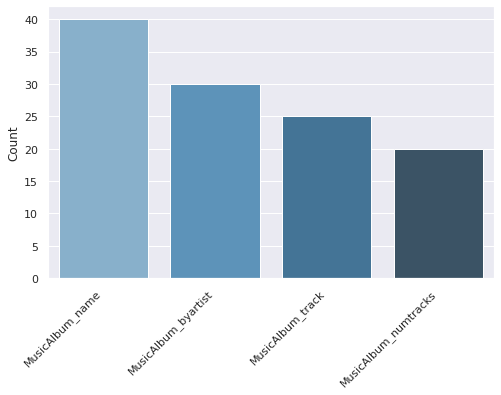

In [62]:
#get count of each column within the medium train set for music album
MA_tr = medium_train.loc[:, medium_train.columns.str.startswith('MusicAlbum')]
MA_tr = MA_tr[MA_tr.index == 'MusicAlbum']
MA_tr = MA_tr.transpose()
MA_tr.reset_index()
MA_tr = MA_tr.rename(columns={'MusicAlbum':'Count'})
MA_tr = MA_tr.sort_values(by=['Count'], ascending=False)
display(MA_tr)
sns.set(rc={'figure.figsize':(8,5)})
plot = sns.barplot(data=MA_tr, x=MA_tr.index, y='Count', palette="Blues_d")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

### Get statsitics for small train set - TV Episode & Music Album

In [61]:
#get statistics for large train set
small_train = pd.read_csv('../../../src/data/schemafiltereddata/TrainTestTables/Small/STrain_Files.csv')
small_train = small_train.groupby('Class').agg(lambda x : x.sum() if x.dtype=='int64' else x.head(1))
small_train

,Unnamed: 0,filename,num_rows,num_columns,num_columns_selected,num_NAs,percentage_col_NA,percentage_table_NA,sum_NA_sel_col,Book_aggregaterating,...,Restaurant_openinghoursspecification,Restaurant_pricerange,Restaurant_servescuisine,Restaurant_telephone,TVEpisode_episodenumber,TVEpisode_name,TVEpisode_partofseries,Small,Medium,Large
Class,,,,,,,,,,,,,,,,,,,,,
Book,9181,Book_abebooks.co.uk_September2020.json.gz,7349.0,12.0,8.0,21380,0.234454,0.048986,23040.0,6,...,0,0,0,0,0,0,0,0.0,0.0,1.0
CreativeWork,652429,CreativeWork_1000museums.com_September2020.jso...,68.0,10.0,6.0,1277,0.382353,0.063725,156.0,0,...,0,0,0,0,0,0,0,0.0,1.0,0.0
Event,2018072,Event_317area.com_September2020.json.gz,22.0,8.0,5.0,6228,0.090909,0.036364,20.0,0,...,0,0,0,0,0,0,0,1.0,0.0,0.0
Hotel,436810,Hotel_accomodationinathens.com_September2020.j...,22.0,7.0,3.0,7294,0.000000,0.000000,0.0,0,...,0,0,0,0,0,0,0,1.0,0.0,0.0
LocalBusiness,1629444,LocalBusiness_5starweddingdirectory.com_Septem...,90.0,9.0,6.0,9933,0.377778,0.074074,240.0,0,...,0,0,0,0,0,0,0,0.0,1.0,0.0
MusicAlbum,132036,MusicAlbum_allmusic.com_September2020.json.gz,6894.0,7.0,3.0,1111,0.158689,0.053186,3300.0,0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
MusicRecording,5715199,MusicRecording_2ugly2hold.com_September2020.js...,13.0,5.0,3.0,1740,0.000000,0.000000,0.0,0,...,0,0,0,0,0,0,0,1.0,0.0,0.0
Person,3732015,Person_ahpeters.com_September2020.json.gz,41.0,8.0,5.0,7608,0.341463,0.068293,70.0,0,...,0,0,0,0,0,0,0,0.0,1.0,0.0
Place,959362,Place_abaton.com_September2020.json.gz,86.0,7.0,3.0,1413,0.395349,0.131783,102.0,0,...,0,0,0,0,0,0,0,0.0,1.0,0.0


Class,Count
MusicAlbum_name,9
MusicAlbum_byartist,8
MusicAlbum_track,6
MusicAlbum_numtracks,5


[Text(0, 0, 'MusicAlbum_name'),
 Text(1, 0, 'MusicAlbum_byartist'),
 Text(2, 0, 'MusicAlbum_track'),
 Text(3, 0, 'MusicAlbum_numtracks')]

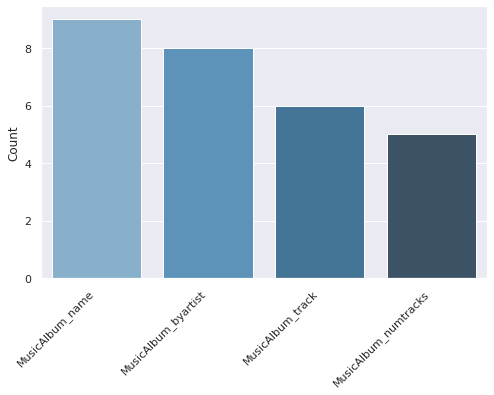

In [63]:
#get count of each column within the small train set for music album
MA_tr = small_train.loc[:, small_train.columns.str.startswith('MusicAlbum')]
MA_tr = MA_tr[MA_tr.index == 'MusicAlbum']
MA_tr = MA_tr.transpose()
MA_tr.reset_index()
MA_tr = MA_tr.rename(columns={'MusicAlbum':'Count'})
MA_tr = MA_tr.sort_values(by=['Count'], ascending=False)
display(MA_tr)
sns.set(rc={'figure.figsize':(8,5)})
plot = sns.barplot(data=MA_tr, x=MA_tr.index, y='Count', palette="Blues_d")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

Class,Count
TVEpisode_name,9
TVEpisode_partofseries,7
TVEpisode_episodenumber,4


[Text(0, 0, 'TVEpisode_name'),
 Text(1, 0, 'TVEpisode_partofseries'),
 Text(2, 0, 'TVEpisode_episodenumber')]

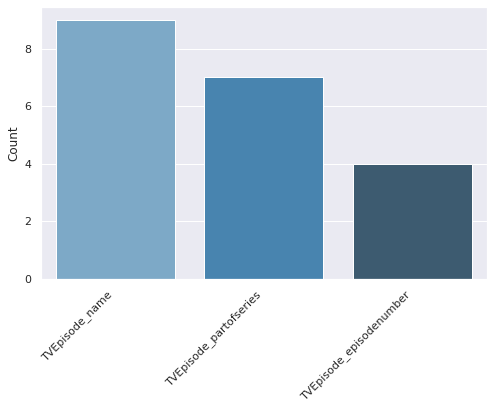

In [64]:
#get count of each column within the small train set for TV Episode
MA_tr = small_train.loc[:, small_train.columns.str.startswith('TVEpisode')]
MA_tr = MA_tr[MA_tr.index == 'TVEpisode']
MA_tr = MA_tr.transpose()
MA_tr.reset_index()
MA_tr = MA_tr.rename(columns={'TVEpisode':'Count'})
MA_tr = MA_tr.sort_values(by=['Count'], ascending=False)
display(MA_tr)
sns.set(rc={'figure.figsize':(8,5)})
plot = sns.barplot(data=MA_tr, x=MA_tr.index, y='Count', palette="Blues_d")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')